### NSP Cases



Here are the libraries / configurations used.

In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [2]:
import time
from datetime import datetime

def print_elapsed_time(start_time,end_time):
    elapsed = end_time - start_time
    seconds = elapsed.days*86400 + elapsed.seconds # drop microseconds
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    print("{hours:02d}:{minutes:02d}:{seconds:02d}".format(**vars()))

### Case - No weekends

In [3]:
#%% Initializations
p_to_accept_negative_change = .001

# Situation definition
matrix_nurses_needed = [5,8,5, 4,7,4, 4,7,4, 4,7,5, 5,7,7, 6,7,8, 7,5,5]
matrix_nurse_availability_type1 = ['x','x','', 'x','x','',  'x','x','', 'x','x','', 'x','x','', '','','', '','','']
matrix_nurse_availability_type2 = ['x','x','x', 'x','x','x',  'x','x','x', 'x','x','x', 'x','x','x', '','','', '','','']
matrix_nurse_availability_type3 = ['x','','', 'x','','',  '','','', 'x','','', 'x','','', '','','', '','','']

# Create Schedule
#schedule_random = Schedule(matrix_nurses_needed=matrix_nurses_needed, is_random=False)
schedule = Schedule(num_nurses_needed=5)

# Create model and nurses
model = abm_scheduling.NSP_AB_Model()
#nurses = model.generate_nurses(10, 0.5, True)
list_nurse_schedules = []
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type3)
list_nurse_schedules.append(matrix_nurse_availability_type3)
nurses = model.generate_nurses_from_nurse_schedules(list_nurse_schedules)
schedule.print_schedule(schedule_name="Intial Situation")

Week's Schedule Intial Situation
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [4]:
# nurse satisfaction when no shift assigned
model.get_total_agent_satisfaction(nurses)

TypeError: 'NoneType' object is not iterable

In [ ]:
model.show_hypothetical_max_schedule(schedule=schedule, nurses=nurses)

In [24]:
# Default utility function (no agent satisfaction)
start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))
results_B_07 = model.run(schedule=schedule, nurses=nurses, beta=0.7, 
                         p_to_accept_negative_change=.001, utility_function_parameters = None)
end_time = datetime.today()
print(str(end_time.strftime("%d-%m-%y %H %M %S")))
print_elapsed_time(start_time,end_time)

11-06-19 22 51 25
Week's Schedule Best Schedule. Beta: (0.7),p: (0.001)
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 3,8,9,5, | 8,5,0,3, | 5,4,0,1, | 9,6,1,8, | 7,1,3,8, |          |          |
|         | 0        | 1        | 2        | 4        | 9        |          |          |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 1,7,2    | 6,5,2,4  | 5,3      | 2,3,0,5  | 0,2,4    |          |          |
| shift 3 | need: 5  | need: 5  | need

In [25]:
model.print_nurse_productivity(nurses)

Nurse productivity -  
0---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
1---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
2---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
3---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
4---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:7, prod: (1.17), satisf: -166.66666666666666
5---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:7, prod: (1.17), satisf: -166.66666666666666
6---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:7, prod: (1.17), satisf: -166.66666666666666
7---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:5, prod: (0.833), satisf: 627.7184923013087
8---------- 
min:4.0, max: 4.0, deg.availab:0.19047619047619047, a

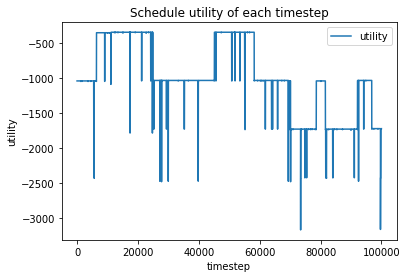

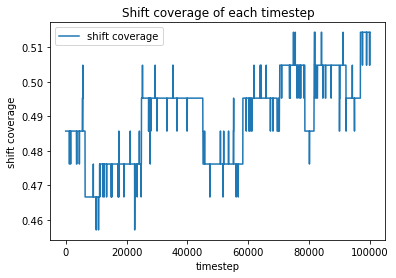

In [26]:
model.plot_utility_per_timestep(results_B_07.utility_each_timestep)
model.plot_shift_coverage_per_timestep(results_B_07.shift_coverage_each_timestep)


In [22]:
# Agent satisfaction utility function
print(str(datetime.today().strftime("%d-%m-%y %H %M %S")))
utility_function_parameters = abm_scheduling.Utility_Function_Parameters()
utility_function_parameters.utility_function = 'agent_satisfaction'
results_B_07 = model.run(schedule=schedule, nurses=nurses, beta=0.7, 
                         p_to_accept_negative_change=.001, utility_function_parameters = utility_function_parameters)
end_time = datetime.today()
print(str(end_time.strftime("%d-%m-%y %H %M %S")))
print_elapsed_time(start_time,end_time)

11-06-19 22 48 14
Week's Schedule Best Schedule. Beta: (0.7),p: (0.001)
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 9,8,2,3, | 2,8,5,1, | 6,5,4,0  | 6,8,9,4, | 7,9,8,5  |          |          |
|         | 1        | 9        |          | 0        |          |          |          |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 0,6      | 0,3      | 2,5,1,3  | 2,4,6,3, | 3,1,0,2  |          |          |
|         |          |          |     

In [23]:
model.print_nurse_productivity(nurses)

Nurse productivity -  
0---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
1---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
2---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
3---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
4---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:5, prod: (0.833), satisf: 627.7184923013087
5---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:9, prod: (1.5), satisf: -500.0
6---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:5, prod: (0.833), satisf: 627.7184923013087
7---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:5, prod: (0.833), satisf: 627.7184923013087
8---------- 
min:4.0, max: 4.0, deg.availab:0.19047619047619047, assigned:4, prod:

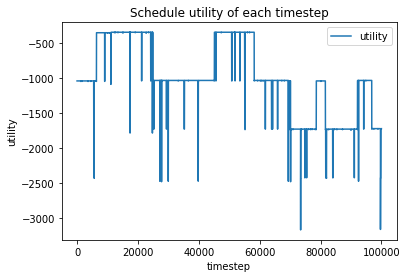

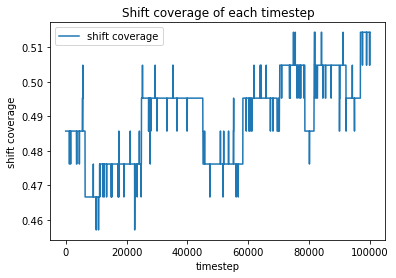

In [27]:
model.plot_utility_per_timestep(results_B_07.utility_each_timestep)
model.plot_shift_coverage_per_timestep(results_B_07.shift_coverage_each_timestep)

In [28]:
# Default utility function (no agent satisfaction)
start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))
results_B_09 = model.run(schedule=schedule, nurses=nurses, beta=0.9, 
                         p_to_accept_negative_change=.001, utility_function_parameters = None)
end_time = datetime.today()
print(str(end_time.strftime("%d-%m-%y %H %M %S")))
print_elapsed_time(start_time,end_time)

11-06-19 22 53 34
Week's Schedule Best Schedule. Beta: (0.9),p: (0.001)
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 5,9,8,2  | 0,8,5,9, | 3,1,0,4  | 4,0,7,8, | 2,9,3,4, |          |          |
|         |          | 6        |          | 9        | 8        |          |          |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 1,3,7,5, | 4,3,1,6, | 5,4,6,2  | 1,3,2    | 5,1,0    |          |          |
|         | 0        | 2        |     

In [ ]:
model.print_nurse_productivity(nurses)

In [29]:
# Agent satisfaction utility function
print(str(datetime.today().strftime("%d-%m-%y %H %M %S")))
utility_function_parameters = abm_scheduling.Utility_Function_Parameters()
utility_function_parameters.utility_function = 'agent_satisfaction'
results_B_09 = model.run(schedule=schedule, nurses=nurses, beta=0.9, 
                         p_to_accept_negative_change=.001, utility_function_parameters = utility_function_parameters)
end_time = datetime.today()
print(str(end_time.strftime("%d-%m-%y %H %M %S")))
print_elapsed_time(start_time,end_time)

11-06-19 22 54 19
Week's Schedule Best Schedule. Beta: (0.9),p: (0.001)
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 9,3,0,8  | 9,1,0,2, | 3,0      | 4,0,5,8, | 2,8,9,1, |          |          |
|         |          | 8        |          | 9        | 4        |          |          |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 1,5,2,4  | 7,3      | 5,6,2,1  | 1,3,2    | 5,7,0,3  |          |          |
| shift 3 | need: 5  | need: 5  | need

In [30]:
model.print_nurse_productivity(nurses)

Nurse productivity -  
0---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
1---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
2---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
3---------- 
min:6, max: 6, deg.availab:0.47619047619047616, assigned:5, prod: (0.833), satisf: 627.7184923013087
4---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:7, prod: (1.17), satisf: -166.66666666666666
5---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:7, prod: (1.17), satisf: -166.66666666666666
6---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:7, prod: (1.17), satisf: -166.66666666666666
7---------- 
min:6, max: 6, deg.availab:0.7142857142857144, assigned:5, prod: (0.833), satisf: 627.7184923013087
8---------- 
min:4.0, max: 4.0, deg.availab:0.19047619047619047, a

In [4]:
# Test upside down assignment nurses
schedule = Schedule(num_nurses_needed=5)

# Create model and nurses
model = abm_scheduling.NSP_AB_Model()
#nurses = model.generate_nurses(10, 0.5, True)
list_nurse_schedules = []
list_nurse_schedules.append(matrix_nurse_availability_type3)
list_nurse_schedules.append(matrix_nurse_availability_type3)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type1)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
list_nurse_schedules.append(matrix_nurse_availability_type2)
nurses = model.generate_nurses_from_nurse_schedules(list_nurse_schedules)
schedule.print_schedule(schedule_name="Intial Situation")

Week's Schedule Intial Situation
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [5]:
# Default utility function (no agent satisfaction)
start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))
results_B_09 = model.run(schedule=schedule, nurses=nurses, beta=0.9, 
                         p_to_accept_negative_change=.001, utility_function_parameters = None)
end_time = datetime.today()
print(str(end_time.strftime("%d-%m-%y %H %M %S")))
print_elapsed_time(start_time,end_time)

11-06-19 23 34 37
Week's Schedule Best Schedule. Beta: (0.9),p: (0.001)
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 0,3,1,6, | 1,6,5,0, | 5,3,8    | 6,5,0,8, | 2,4,0,5, |          |          |
|         | 9        | 7        |          | 1        | 1        |          |          |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 4,2,5    | 2,3,8,4  | 4,6,2    | 4,2,3    | 7,3,6    |          |          |
| shift 3 | need: 5  | need: 5  | need

In [6]:
model.print_nurse_productivity(nurses)

Nurse productivity -  
-- 0 ------------------------------- 
assigned:4,	min:4,	max: 4,	deg.availab:0.19,	prod: 1.00,	satisf: 1291.9271
-- 1 ------------------------------- 
assigned:4,	min:4,	max: 4,	deg.availab:0.19,	prod: 1.00,	satisf: 1291.9271
-- 2 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 3 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 4 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 5 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 6 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.71,	prod: 0.83,	satisf: 627.7185
-- 7 ------------------------------- 
assigned:9,	min:6,	max: 6,	deg.availab:0.71,	prod: 1.50,	satisf: -500.0000
-- 8 ------------------------------- 
assigned:7,	min:6,	max: 6,	deg.availab:0

In [7]:
# Agent satisfaction utility function
print(str(datetime.today().strftime("%d-%m-%y %H %M %S")))
utility_function_parameters = abm_scheduling.Utility_Function_Parameters()
utility_function_parameters.utility_function = 'agent_satisfaction'
results_B_09 = model.run(schedule=schedule, nurses=nurses, beta=0.9, 
                         p_to_accept_negative_change=.001, utility_function_parameters = utility_function_parameters)
end_time = datetime.today()
print(str(end_time.strftime("%d-%m-%y %H %M %S")))
print_elapsed_time(start_time,end_time)

11-06-19 23 35 36
Week's Schedule Best Schedule. Beta: (0.9),p: (0.001)
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 0,4,9,1, | 0,1,9    | 8,5,2,7, | 2,9,0,1  | 0,3,1,4  |          |          |
|         | 5        |          | 4        |          |          |          |          |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
|         | 3,2,6    | 5,3,4,2  | 9,6,7,3  | 4,5,3    | 5,6,2    |          |          |
| shift 3 | need: 5  | need: 5  | need

In [8]:
model.print_nurse_productivity(nurses)

Nurse productivity -  
-- 0 ------------------------------- 
assigned:4,	min:4,	max: 4,	deg.availab:0.19,	prod: 1.00,	satisf: 1291.9271
-- 1 ------------------------------- 
assigned:4,	min:4,	max: 4,	deg.availab:0.19,	prod: 1.00,	satisf: 1291.9271
-- 2 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 3 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 4 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 5 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.48,	prod: 0.83,	satisf: 627.7185
-- 6 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0.71,	prod: 0.83,	satisf: 627.7185
-- 7 ------------------------------- 
assigned:7,	min:6,	max: 6,	deg.availab:0.71,	prod: 1.17,	satisf: -166.6667
-- 8 ------------------------------- 
assigned:5,	min:6,	max: 6,	deg.availab:0